In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from EngbertMicrosaccadeToolbox import microsac_detection

In [2]:
# Set parameters
SAMPLING = 500
MINDUR = 3
VFAC = 5

In [3]:
# Read raw data (ASCII; subject 01, trial 005)
d = pd.read_csv("data/f01.005.dat", sep="\t", header=None, names=["t", "x_l", "y_l", "x_r", "y_r"])
d.head()
d = d.loc[3000:4499]
d.head()

,t,x_l,y_l,x_r,y_r
3000,6000.0,0.01188,0.60588,-0.21384,0.41976
3001,6002.0,0.02376,0.61380,-0.20988,0.41580
3002,6004.0,0.02772,0.62172,-0.19800,0.41976
3003,6006.0,0.03564,0.71280,-0.20196,0.41184
3004,6008.0,0.06336,0.64152,-0.20196,0.42372


In [4]:
right_eye = np.vstack([np.asarray(d.x_r), np.asarray(d.y_r)]).T
left_eye = np.vstack([np.asarray(d.x_l), np.asarray(d.y_l)]).T


In [5]:
ms_r = microsac_detection.microsacc(right_eye)
ms_l = microsac_detection.microsacc(left_eye)

In [6]:
bino, monol, monor = microsac_detection.binsacc(ms_r, ms_l)

In [7]:
bino = pd.DataFrame(bino, columns=["onset_l", "end_l", "peakvelocity_l", "horizontalcomponent_l", "verticalcomponent_l","horizontalamplitude_l", "verticalamplitude_l", "onset_r", "end_r", "peakvelocity_r", "horizontalcomponent_r", "verticalcomponent_r","horizontalamplitude_r", "verticalamplitude_r"])

In [8]:
d = d.reset_index(drop=True).reset_index(names=["t_real"])
d

,t_real,t,x_l,y_l,x_r,y_r
0,0,6000.0,0.01188,0.60588,-0.21384,0.41976
1,1,6002.0,0.02376,0.61380,-0.20988,0.41580
2,2,6004.0,0.02772,0.62172,-0.19800,0.41976
3,3,6006.0,0.03564,0.71280,-0.20196,0.41184
4,4,6008.0,0.06336,0.64152,-0.20196,0.42372
...,...,...,...,...,...,...
1495,1495,8990.0,-0.05148,0.28512,-0.07920,-0.05148
1496,1496,8992.0,-0.04752,0.28908,-0.06336,-0.04356
1497,1497,8994.0,-0.07524,0.29700,-0.07524,-0.04752
1498,1498,8996.0,-0.05544,0.29700,-0.08316,-0.03960


In [12]:
bino

,onset_l,end_l,peakvelocity_l,horizontalcomponent_l,verticalcomponent_l,horizontalamplitude_l,verticalamplitude_l,onset_r,end_r,peakvelocity_r,horizontalcomponent_r,verticalcomponent_r,horizontalamplitude_r,verticalamplitude_r
0,343,355,35.921527,0.19800,0.20196,0.33264,0.22968,344,354,37.709630,0.26136,0.27324,0.34848,0.27324
1,449,453,27.759258,-0.18216,-0.07920,-0.18216,-0.07920,450,456,27.326311,-0.15840,-0.23760,-0.16632,-0.23760
2,1234,1237,21.304816,-0.13068,0.05544,-0.13068,0.06732,1232,1238,14.327474,-0.13068,0.00792,-0.13464,0.01980
3,1240,1243,19.202484,0.10692,0.07128,0.10692,0.07128,1240,1247,16.657647,0.17424,0.07524,0.17424,0.07524


In [20]:
d["sac"] = 0
for idx, row in bino.iterrows():
  print(row)
  #d.loc[d>row["onset_l"] & d<row["end_l"]]

onset_l                  343.000000
end_l                    355.000000
peakvelocity_l            35.921527
horizontalcomponent_l      0.198000
verticalcomponent_l        0.201960
horizontalamplitude_l      0.332640
verticalamplitude_l        0.229680
onset_r                  344.000000
end_r                    354.000000
peakvelocity_r            37.709630
horizontalcomponent_r      0.261360
verticalcomponent_r        0.273240
horizontalamplitude_r      0.348480
verticalamplitude_r        0.273240
Name: 0, dtype: float64
onset_l                  449.000000
end_l                    453.000000
peakvelocity_l            27.759258
horizontalcomponent_l     -0.182160
verticalcomponent_l       -0.079200
horizontalamplitude_l     -0.182160
verticalamplitude_l       -0.079200
onset_r                  450.000000
end_r                    456.000000
peakvelocity_r            27.326311
horizontalcomponent_r     -0.158400
verticalcomponent_r       -0.237600
horizontalamplitude_r     -0.166320
vert

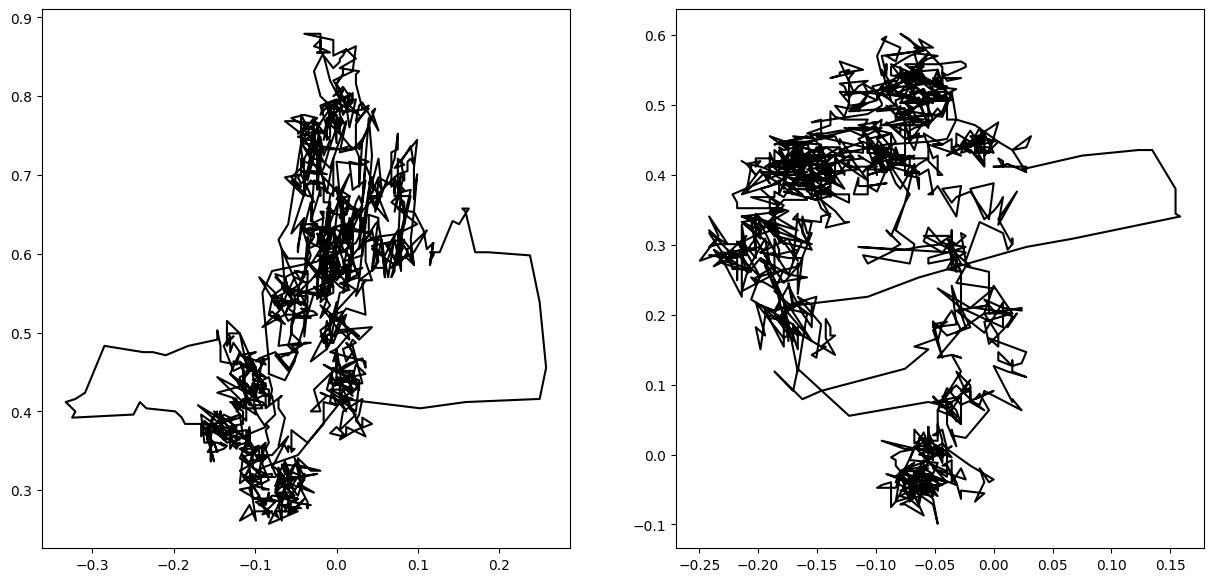

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(d.x_l, d.y_l, c="black")
ax[0].scatter(bino.x_l, d.y_l, c="black")

#ax[1].plot(d.x_r, d.y_r, c="black")

In [26]:
bb


array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.96000000e+00,  0.00000000e+00],
       [ 1.65000000e+00, -4.62592927e-15],
       ...,
       [-1.65000000e+00,  2.64000000e+00],
       [-9.90000000e-01,  5.94000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [32]:
msd = np.sqrt(np.median((bb-np.median(bb, axis=0))**2, axis=0))

In [33]:
radius = VFAC * msd

In [37]:
test = ((bb/radius)**2).sum(axis=1)
test

array([0.        , 0.2304    , 0.04      , ..., 0.11111111, 0.3744    ,
       0.        ])

In [47]:
np.where(test>1)[0].shape

(41,)

In [34]:
radius

array([8.25, 9.9 ])

In [13]:
w = np.array([[1,2,3], [1,2,3]]).T
w.cumsum(axis=0)

array([[1, 1],
       [3, 3],
       [6, 6]])

In [68]:
aa[0:10]

array([[-0.21384,  0.41976],
       [-0.20988,  0.4158 ],
       [-0.198  ,  0.41976],
       [-0.20196,  0.41184],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.19008,  0.42372],
       [-0.18612,  0.41976],
       [-0.15444,  0.4158 ]])

In [109]:
def vecvel(x, sampling):
  N, _ = x.shape
  v = np.zeros((N, 2))
  print(v.shape)
  v[2:(N-2),] = SAMPLING/6*(x[4:N,] + x[3:(N-1),] - x[1:(N-3),] - x[0:(N-4),])
  v[1,] = SAMPLING/2*(x[2,] - x[0,])
  v[(N-2),] = SAMPLING/2*(x[N-1,] - x[(N-3),])  
  return v
  

In [110]:
N, _ = aa.shape
aa[4:N-1,].shape
aa[3:N-2,].shape
aa[1:(N-4),].shape
aa[0:(N-5),].shape

(1495, 2)

In [111]:
aa[N-1,1]

-0.02376

In [112]:
aa[4:N-1,]

array([[-0.20196,  0.42372],
       [-0.20196,  0.42372],
       [-0.20196,  0.42372],
       ...,
       [-0.06336, -0.04356],
       [-0.07524, -0.04752],
       [-0.08316, -0.0396 ]])

In [113]:
aa = np.array([[1,2,3,4, 5, 6],[1,2,3,4,5, 6]]).T
aa.shape

(6, 2)